In [36]:
#Load Image, View, Save - OpenCV, PIL
import cv2
import numpy as np
image = cv2.imread('images/chicago.jpg', 1)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/exam.jpg',image)

True

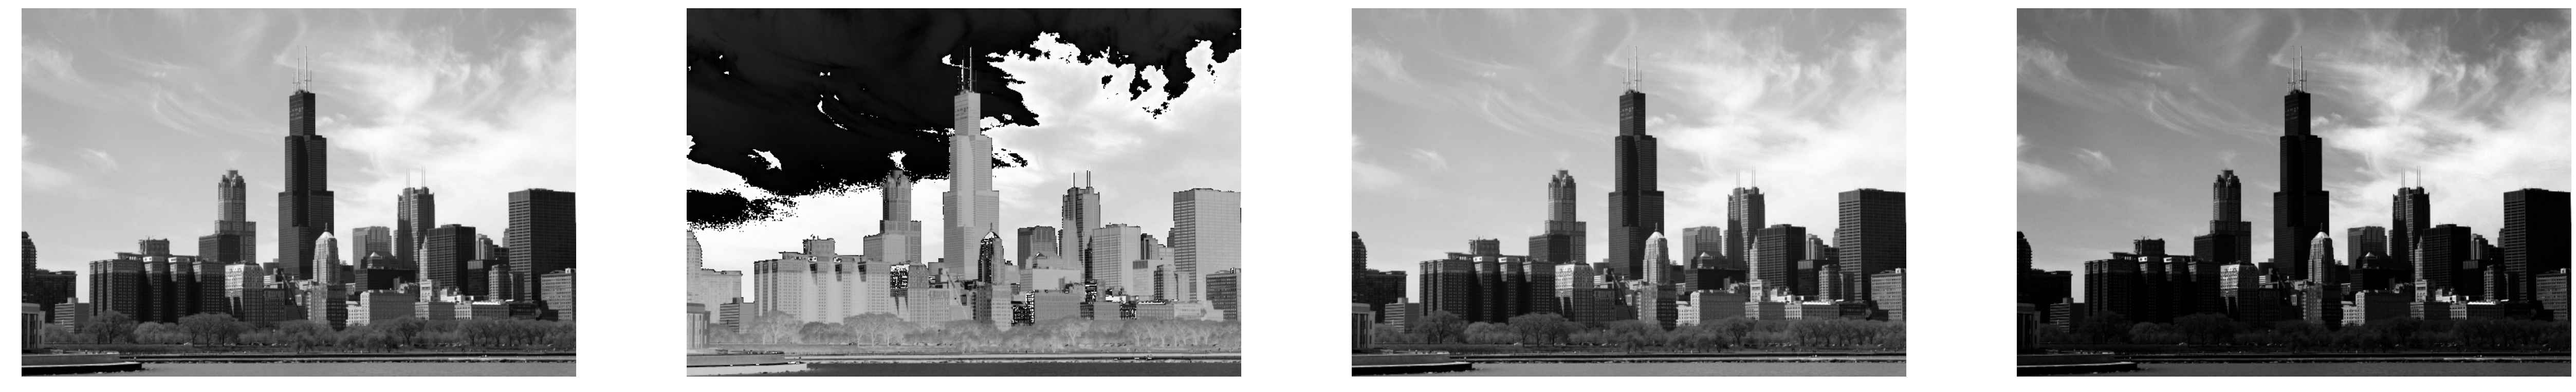

In [2]:
#Intensity Transformation
from PIL import Image
from pylab import *

ht = array(Image.open('images\chicago.jpg').convert('L'))
ht2 = 200 - ht #invert image
ht3 = (100.0/200) * ht + 100 #clamp to interval 100...200
ht4 = 255.0 * (ht/200.0)**2 #squared
fig, axs = subplots(1, 4, figsize=(64, 64))

axs[0].imshow(ht)
axs[0].axis('off')
axs[1].imshow(ht2)
axs[1].axis('off')
axs[2].imshow(ht3)
axs[2].axis('off')
axs[3].imshow(ht4)
axs[3].axis('off')

gray()
show()

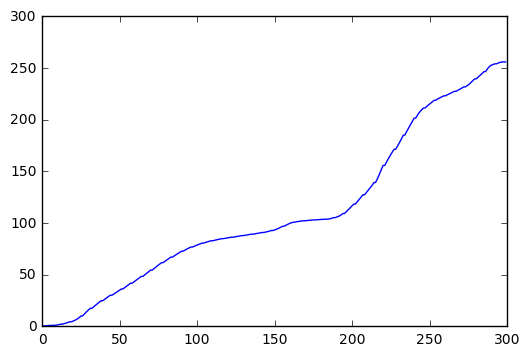

In [3]:
#Histogram Equalization
def histeq(ht,nbr_bins=300):
    """ Histogram equalization of a grayscale image. """
    
    # get image histogram
    imhist,bins = histogram(ht.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 256 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    ht2 = interp(ht.flatten(),bins[:-1],cdf)
    return ht2.reshape(ht.shape), cdf

ht2,cdf = histeq(ht)
figure()
plot(cdf)
show()

In [ ]:
import sys
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

# import matplotlib.pyplot as pl
# read image to array
im = cv2.imread('images/stata',0)
row,col=im.shape

negative=np.zeros((row,col))
for i in range (row):
    for j in range (col):
        negative[i][j]=255-im[i][j]
    
    #negative=uint8(negative)
log=np.zeros((row,col))
for i in range (row):
    for j in range (col):
        log[i][j]=50*log10(1+im[i][j])

#log=uint8(log)
gamma=np.zeros((row,col))
g=0.1
for i in range (row):
    for j in range (col):
        gamma[i][j]=50*pow(im[i][j],g)

#gamma=uint8(log)
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(im)
axs[0].axis('on')
axs[1].imshow(negative)
axs[1].axis('on')
axs[2].imshow(log)
axs[2].axis('on')
axs[3].imshow(gamma)
axs[3].axis('on')
gray()
show()

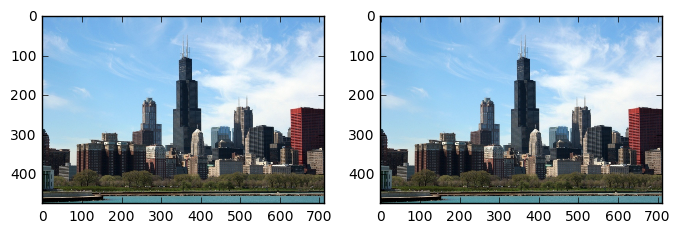

In [34]:
#Image Convolution - Average, Laplacian
Ave = array(Image.open('images/chicago.jpg'))
def compute_average(imlist):
    """ Compute the average of a list of images. """
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...skipped')
    averageim /= len(imlist)
    # return average as uint8
    return array(averageim, 'uint8')

fig, axs = subplots(1, 2, figsize=(8, 8))
axs[0].imshow(im)
axs[0].axis('on')
axs[1].imshow(Ave)
axs[1].axis('on')
gray()
show()

In [30]:
#convolusion
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np
img=cv2.imread('images/stata.jpg',0)
row,col=img.shape

#Performing the laplacian operation
laplacian=np.zeros((row,col))
averaging=np.zeros((row,col))
maskSize=3
mask=np.zeros((maskSize,maskSize))

In [31]:
#laplacian Operations
weight=maskSize*maskSize


mask=[[0,-1,0],[-1,4,-1],[0,-1,0]]

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        acc=0
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                acc=acc+img[k-i][l-j]*mask[i+(maskSize//2)][j+(maskSize//2)]
        laplacian[k][l]=acc

In [32]:

# Laplacian averaging

mask=[[1,1,1],[1,1,1],[1,1,1]]

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        acc=0
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                acc=acc+img[k+i][l+j]*mask[i+1][j+1]
        averaging[k][l]=acc /weight

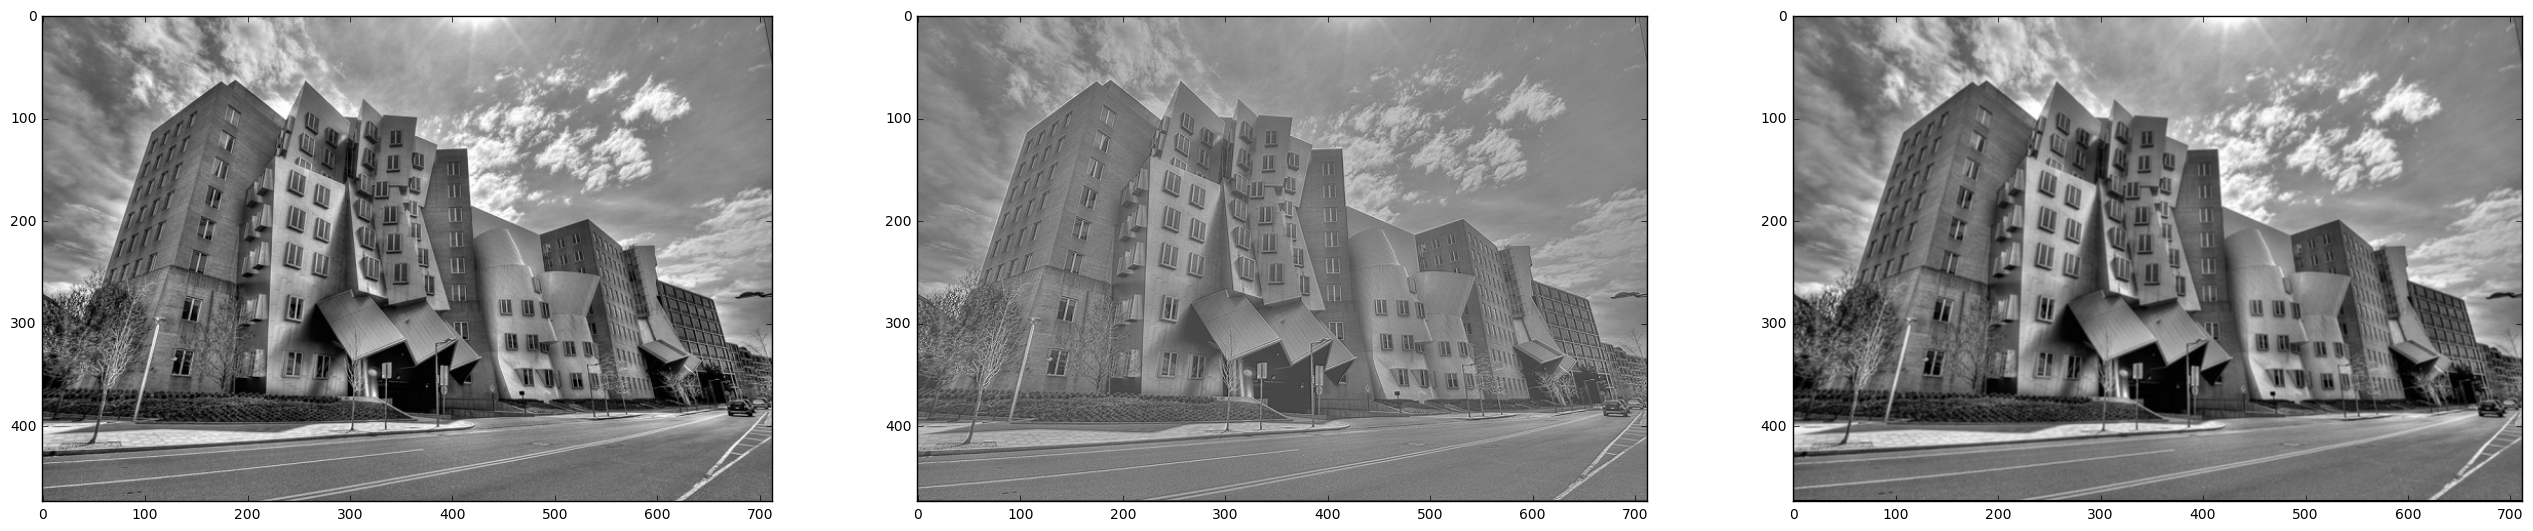

In [24]:
fig, axs = subplots(1, 3, figsize=(32, 32))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(laplacian)
axs[1].axis('on')
axs[2].imshow(averaging)
axs[2].axis('on')
gray()
show()